In [1]:
from MHW_daily_calcs import *
import matplotlib.pyplot as plt
import cmocean
import itertools

SEDI was higher, particularly for tropical Pacific, when no smoothing was applied. Try to identify cause. First, compare detrended anomaly time series.

In [2]:
climyrs=[1993,2023]
qtile=0.90
detr=True
#smoothClim=True
smoothTrend=True
meth=method
win=halfwin
qtvar='qt1'
delt=15
jj=60
p1=[215,216,80-60,81-60]

In [3]:
fanom=dict()
fMHW=dict()
fQ=dict()
pselect= lambda ds: ds.isel(lat=p1[2],lon=p1[0])
fanom['obs','sm','det']=xr.open_mfdataset([fnameOISSTAnomDetr([ylimlistobs[0][0],ylimlistobs[-1][-1]],climyrs, jj, smoothClim=True, meth=meth, win=win),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fanom['obs','sm','nod']=xr.open_mfdataset([fnameOISSTAnom(yrlims, climyrs, jj, smoothClim=True, meth=meth, win=win) for yrlims in ylimlistobs],
                                     parallel=True,decode_times=False,preprocess=pselect)
fanom['obs','id','det']=xr.open_mfdataset([fnameOISSTAnomDetr([ylimlistobs[0][0],ylimlistobs[-1][-1]],climyrs, jj, smoothClim=False, meth=None, win=1),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fanom['obs','id','nod']=xr.open_mfdataset([fnameOISSTAnom(yrlims, climyrs, jj, smoothClim=False, meth=None, win=1) for yrlims in ylimlistobs],
                                     parallel=True,decode_times=False,preprocess=pselect)
fanom['mod','sm','det']=xr.open_mfdataset([fnameCanESMAnomDetrByLead(workdir, climyrs[0], climyrs[-1], ilead, jj,smoothClim=True,
                                                        smoothTrend=True,meth=meth,win=win) for ilead in range(0,200)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fanom['mod','sm','nod']=xr.open_mfdataset([fnameCanESMAnomByLeadNoDetr(workdir, climyrs[0], climyrs[-1], ilead, jj,smoothClim=True,
                                                                       meth=meth,win=win) for ilead in range(0,200)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fanom['mod','id','det']=xr.open_mfdataset([fnameCanESMAnomDetrByLead(workdir, climyrs[0], climyrs[-1], ilead, jj,smoothClim=False,
                                                        smoothTrend=False,meth=None,win=1) for ilead in range(0,200)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fanom['mod','id','nod']=xr.open_mfdataset([fnameCanESMAnomByLeadNoDetr(workdir, climyrs[0], climyrs[-1], ilead, jj,smoothClim=False,
                                                                       meth=None,win=1) for ilead in range(0,200)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)


In [4]:

fMHW['obs','sm','det']=xr.open_mfdataset([fnameOISSTMHW(climyrs, jj, qtile, smoothClim=True, meth=meth, win=win,detr=True,delt=delt,qtvar='qt1'),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fMHW['obs','sm','nod']=xr.open_mfdataset([fnameOISSTMHW(climyrs, jj, qtile, smoothClim=True, meth=meth, win=win,detr=False,delt=delt,qtvar='qt1'),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fMHW['obs','id','det']=xr.open_mfdataset([fnameOISSTMHW(climyrs, jj, qtile, smoothClim=False, meth=None, win=1,detr=True,delt=delt,qtvar='qt1'),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fMHW['obs','id','nod']=xr.open_mfdataset([fnameOISSTMHW(climyrs, jj, qtile, smoothClim=False, meth=None, win=1,detr=False,delt=delt,qtvar='qt1'),],
                                     parallel=True,decode_times=False,preprocess=pselect)
lmax=100
fMHW['mod','sm','det']=xr.open_mfdataset([fnameCanESMMHW(workdir, climyrs[0], climyrs[-1], ilead, jj,qtile,detrend=True,smoothClim=True,
                                            smoothTrend=True,meth=meth,win=win,delt=delt,qtvar='qt1') for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fMHW['mod','sm','nod']=xr.open_mfdataset([fnameCanESMMHW(workdir, climyrs[0], climyrs[-1], ilead, jj,qtile,detrend=False,smoothClim=True,
                                            smoothTrend=True,meth=meth,win=win,delt=delt,qtvar='qt1') for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fMHW['mod','id','det']=xr.open_mfdataset([fnameCanESMMHW(workdir, climyrs[0], climyrs[-1], ilead, jj,qtile,detrend=True,smoothClim=False,
                                            smoothTrend=False,meth=None,win=1,delt=delt,qtvar='qt1') for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fMHW['mod','id','nod']=xr.open_mfdataset([fnameCanESMMHW(workdir, climyrs[0], climyrs[-1], ilead, jj,qtile,detrend=False,smoothClim=False,
                                            smoothTrend=False,meth=None,win=1,delt=delt,qtvar='qt1')  for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)

In [5]:
fQ['obs','sm','det']=xr.open_mfdataset([fnameOISSTQTile(climyrs, jj, qtile, smoothClim=True, meth=meth, win=win,detr=True,delt=delt),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fQ['obs','sm','nod']=xr.open_mfdataset([fnameOISSTQTile(climyrs, jj, qtile, smoothClim=True, meth=meth, win=win,detr=False,delt=delt),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fQ['obs','id','det']=xr.open_mfdataset([fnameOISSTQTile(climyrs, jj, qtile, smoothClim=False, meth=None, win=1,detr=True,delt=delt),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fQ['obs','id','nod']=xr.open_mfdataset([fnameOISSTQTile(climyrs, jj, qtile, smoothClim=False, meth=None, win=1,detr=False,delt=delt),],
                                     parallel=True,decode_times=False,preprocess=pselect)
lmax=100
fQ['mod','sm','det']=xr.open_mfdataset([fnameCanESMAnomQtile(workdir, climyrs[0], climyrs[-1], ilead, jj, qtile,detrend=True,smoothClim=True,
                                smoothTrend=True,meth=meth,win=win,delt=delt) for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fQ['mod','sm','nod']=xr.open_mfdataset([fnameCanESMAnomQtile(workdir, climyrs[0], climyrs[-1], ilead, jj, qtile,detrend=False,smoothClim=True,
                                smoothTrend=True,meth=meth,win=win,delt=delt) for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fQ['mod','id','det']=xr.open_mfdataset([fnameCanESMAnomQtile(workdir, climyrs[0], climyrs[-1], ilead, jj, qtile,detrend=True,smoothClim=False,
                                smoothTrend=False,meth=None,win=1,delt=delt) for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fQ['mod','id','nod']=xr.open_mfdataset([fnameCanESMAnomQtile(workdir, climyrs[0], climyrs[-1], ilead, jj, qtile,detrend=False,smoothClim=False,
                                smoothTrend=False,meth=None,win=1,delt=delt) for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)

In [6]:
sstan=dict()
mhw=dict()
Q=dict()
keylist=[('obs','sm','det'),
         ('obs','sm','nod'),
         ('obs','id','det'),
         ('obs','id','nod'),
         ('mod','sm','det'),
         ('mod','sm','nod'),
         ('mod','id','det'),
         ('mod','id','nod'),]
for key in keylist:
    print(key)
    sstan[key]=fanom[key].sst_an.load()
    mhw[key]=fMHW[key].MHW_prob.load() if key[0]=='mod' else fMHW[key].isMHW.load()
    Q[key]=fQ[key].qt1.load()

('obs', 'sm', 'det')
('obs', 'sm', 'nod')
('obs', 'id', 'det')
('obs', 'id', 'nod')
('mod', 'sm', 'det')
('mod', 'sm', 'nod')
('mod', 'id', 'det')
('mod', 'id', 'nod')


In [7]:
fanom['obs','sm','det'].time
tobs=np.array([dt.datetime(1978,1,1,12)+dt.timedelta(days=float(ii)) for ii in fanom['obs','sm','det'].time.values])
ydobs=np.array([yd365(el) for el in tobs]) # day 366 is returned as 365

(np.float64(8401.0), np.float64(19783.0))

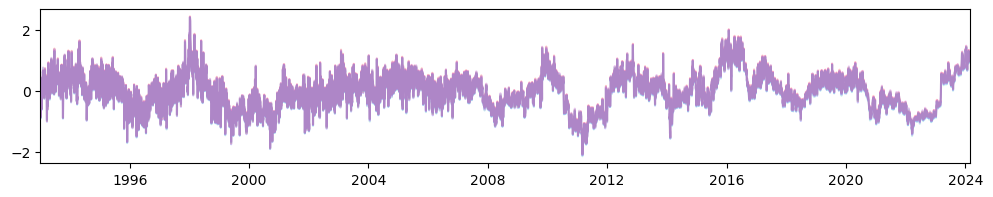

In [8]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,fanom['obs','sm','det']['sst_an'],'b-',alpha=.2)
ax.plot(tobs,fanom['obs','sm','nod']['sst_an'],'r-',alpha=.2)
ax.plot(tobs,fanom['obs','id','det']['sst_an'],'c-',alpha=.2)
ax.plot(tobs,fanom['obs','id','nod']['sst_an'],'m-',alpha=.2)
ax.set_xlim(dt.datetime(1993,1,1),dt.datetime(2024,3,1))

(np.float64(8401.0), np.float64(19783.0))

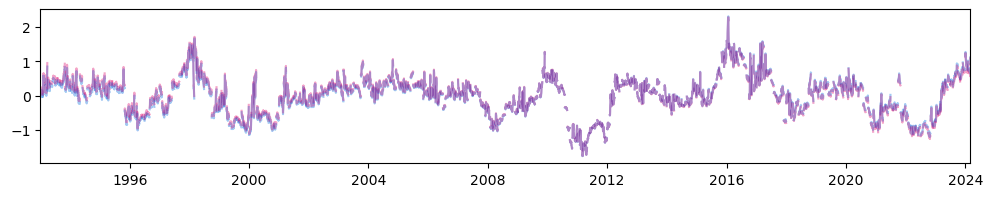

In [9]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ie=0
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],sstan['mod','sm','det'][:28,ir,ie],'b-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','sm','nod'][:28,ir,ie],'r-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','det'][:28,ir,ie],'c-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','nod'][:28,ir,ie],'m-',alpha=.2)
ax.set_xlim(dt.datetime(1993,1,1),dt.datetime(2024,3,1))

(-1.1, 1.5)

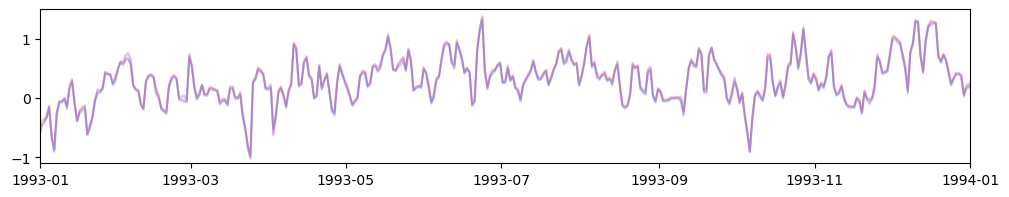

In [10]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,fanom['obs','sm','det']['sst_an'],'b-',alpha=.2)
ax.plot(tobs,fanom['obs','sm','nod']['sst_an'],'r-',alpha=.2)
ax.plot(tobs,fanom['obs','id','det']['sst_an'],'c-',alpha=.2)
ax.plot(tobs,fanom['obs','id','nod']['sst_an'],'m-',alpha=.2)
ax.set_xlim(dt.datetime(1993,1,1),dt.datetime(1994,1,1))
ax.set_ylim(-1.1,1.5)

(-1.1, 1.5)

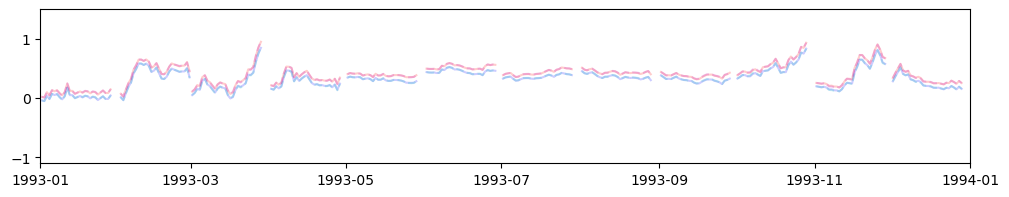

In [11]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ie=0
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],sstan['mod','sm','det'][:28,ir,ie],'b-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','sm','nod'][:28,ir,ie],'r-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','det'][:28,ir,ie],'c--',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','nod'][:28,ir,ie],'m--',alpha=.2)
ax.set_xlim(dt.datetime(1993,1,1),dt.datetime(1994,1,1))
ax.set_ylim(-1.1,1.5)

(-1.0, 1.3)

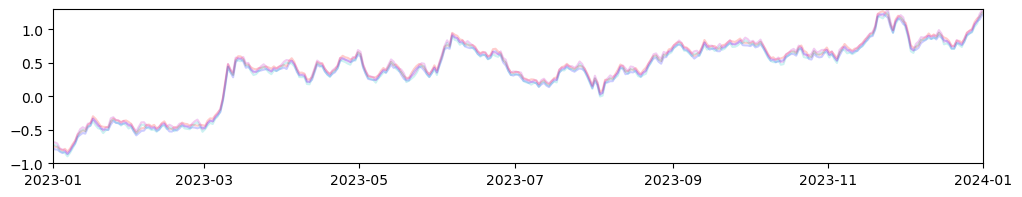

In [12]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,fanom['obs','sm','det']['sst_an'],'b-',alpha=.2)
ax.plot(tobs,fanom['obs','sm','nod']['sst_an'],'r-',alpha=.2)
ax.plot(tobs,fanom['obs','id','det']['sst_an'],'c-',alpha=.2)
ax.plot(tobs,fanom['obs','id','nod']['sst_an'],'m-',alpha=.2)
ax.set_xlim(dt.datetime(2023,1,1),dt.datetime(2024,1,1))
ax.set_ylim(-1,1.3)

(-1.0, 1.3)

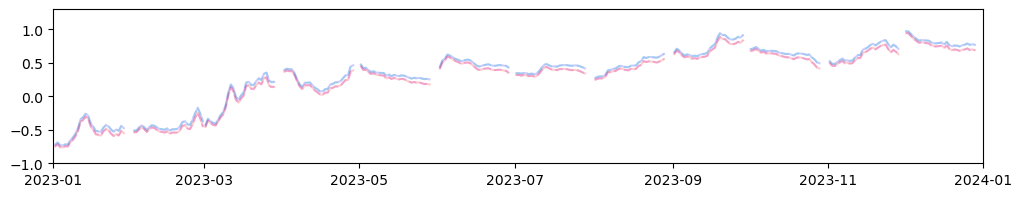

In [13]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ie=0
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],sstan['mod','sm','det'][:28,ir,ie],'b-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','sm','nod'][:28,ir,ie],'r-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','det'][:28,ir,ie],'c--',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','nod'][:28,ir,ie],'m--',alpha=.2)
ax.set_xlim(dt.datetime(2023,1,1),dt.datetime(2024,1,1))
ax.set_ylim(-1,1.3)


MHW


(np.float64(8401.0), np.float64(19783.0))

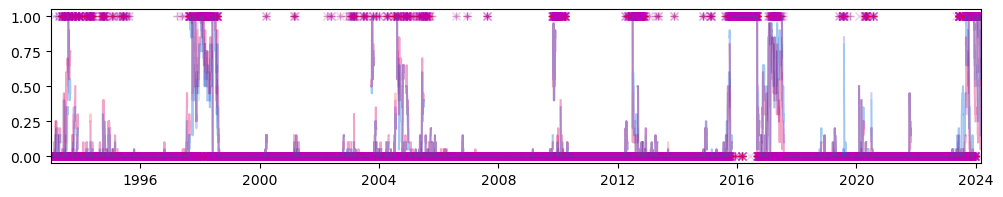

In [14]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,mhw['obs','sm','det'],'b+',alpha=.2)
ax.plot(tobs,mhw['obs','sm','nod'],'r+',alpha=.2)
#ax.plot(tobs,mhw['obs','id','det'],'cx',alpha=.2)
ax.plot(tobs,mhw['obs','id','nod'],'mx',alpha=.2)
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],mhw['mod','sm','det'][:28,ir,],'b-',alpha=.2)
    ax.plot(tmod[:28],mhw['mod','sm','nod'][:28,ir],'r-',alpha=.2)
    ax.plot(tmod[:28],mhw['mod','id','det'][:28,ir],'c-',alpha=.2)
    ax.plot(tmod[:28],mhw['mod','id','nod'][:28,ir],'m-',alpha=.2)
ax.set_xlim(dt.datetime(1993,1,1),dt.datetime(2024,3,1))

/tmp/reo000/1838413/ipykernel_2026756/2219761213.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=plt.subplots(1,1,figsize=(12,2))


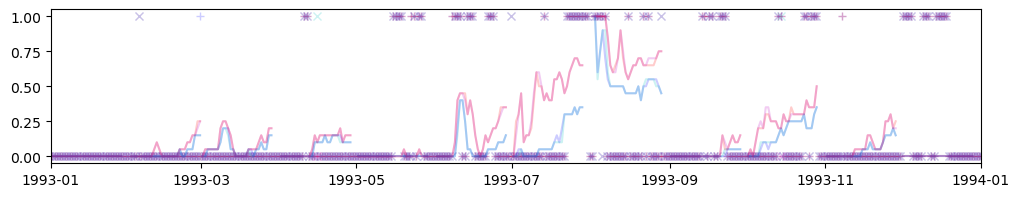

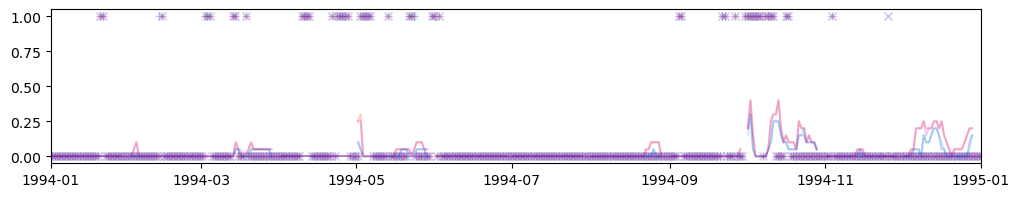

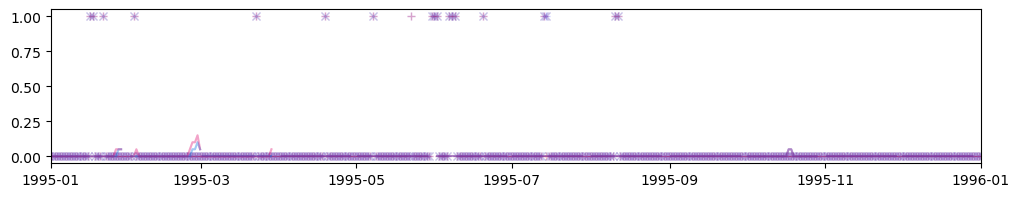

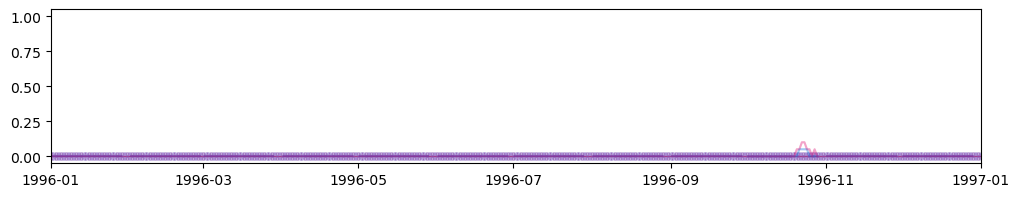

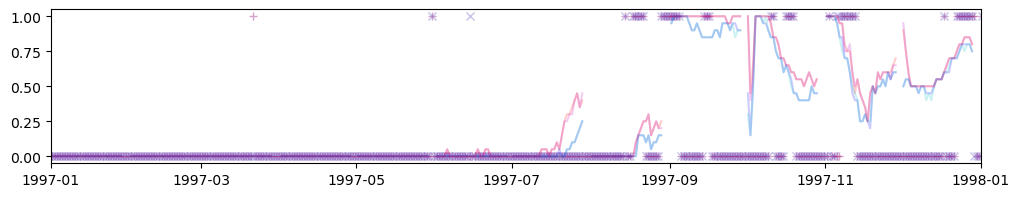

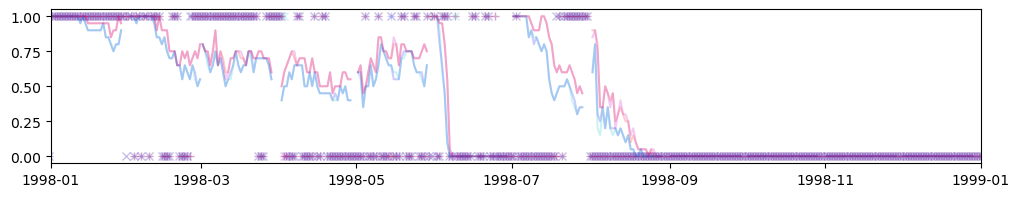

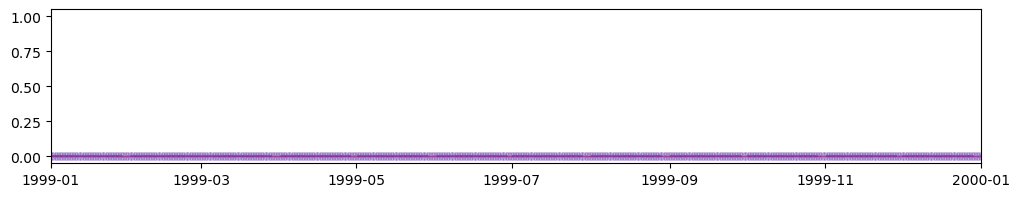

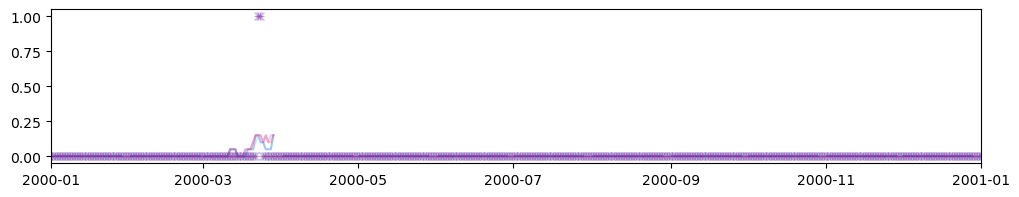

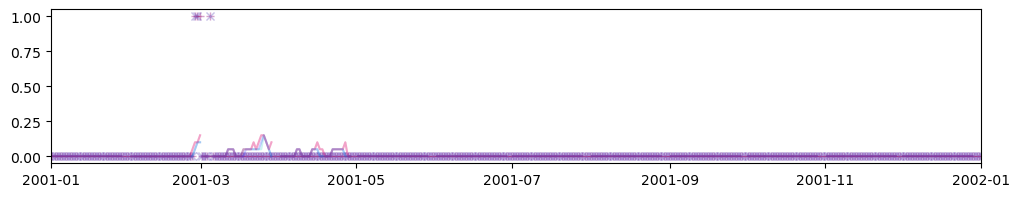

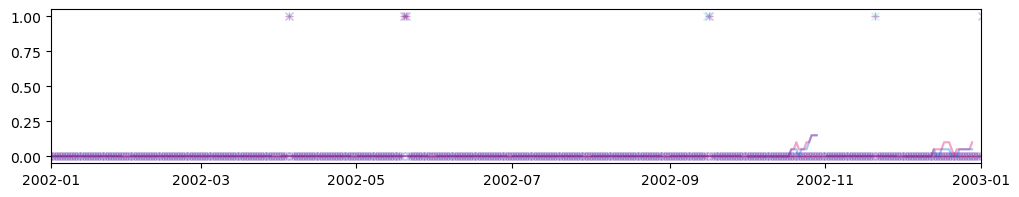

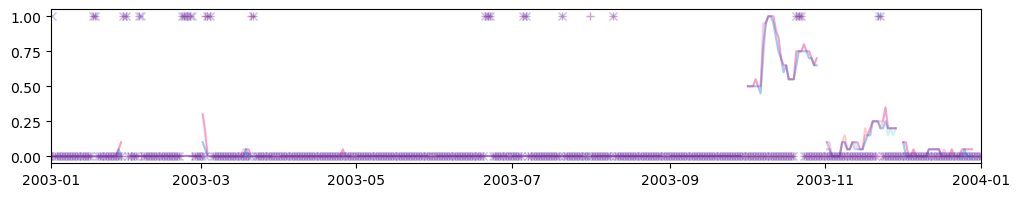

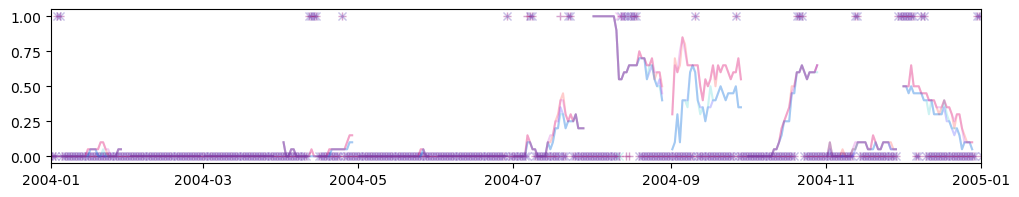

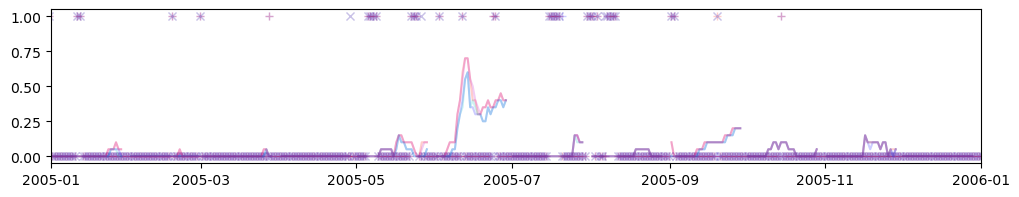

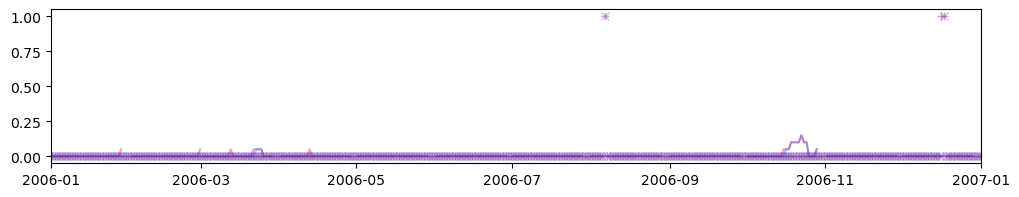

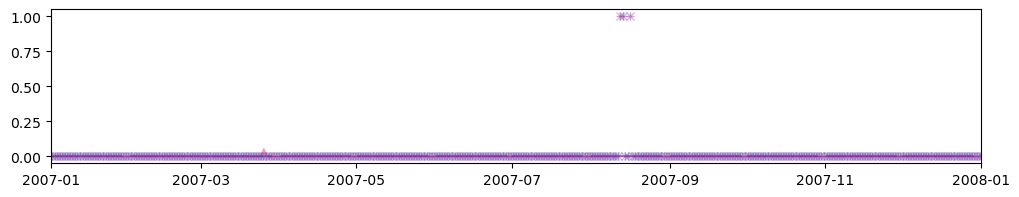

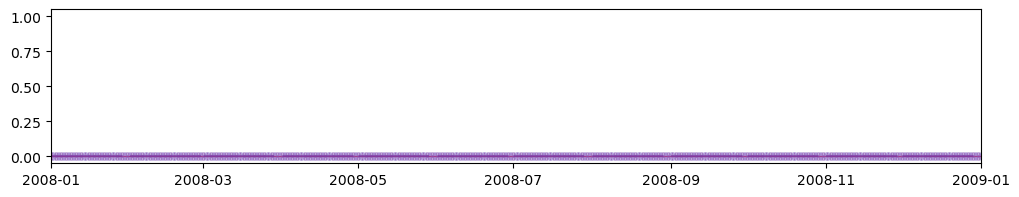

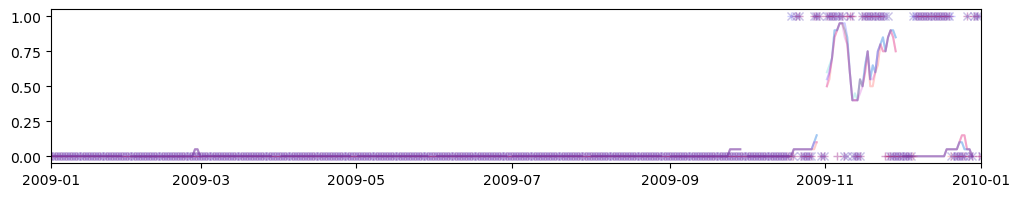

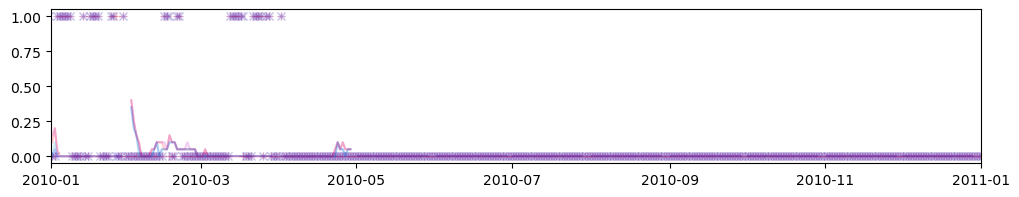

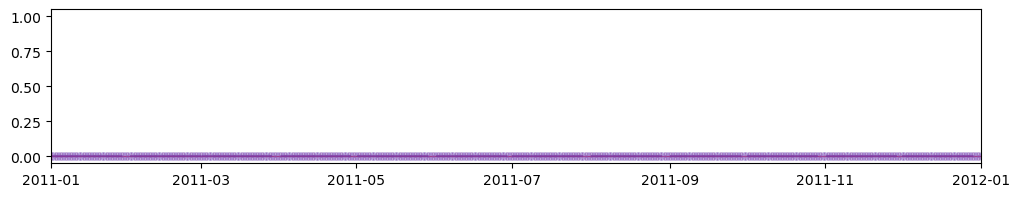

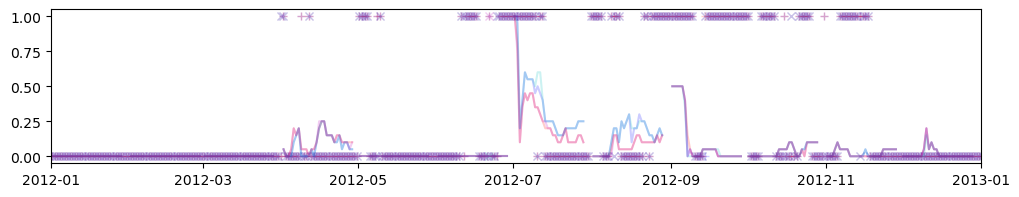

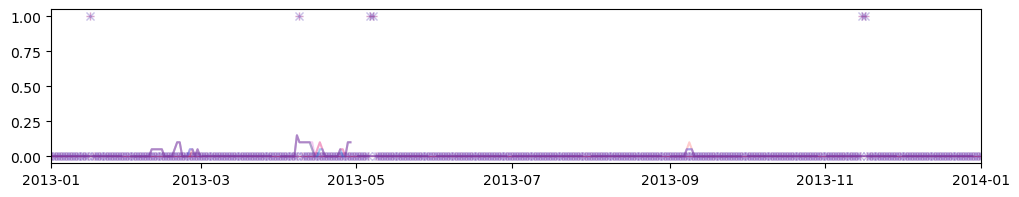

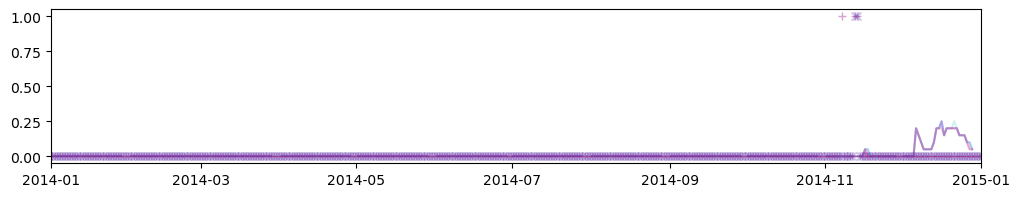

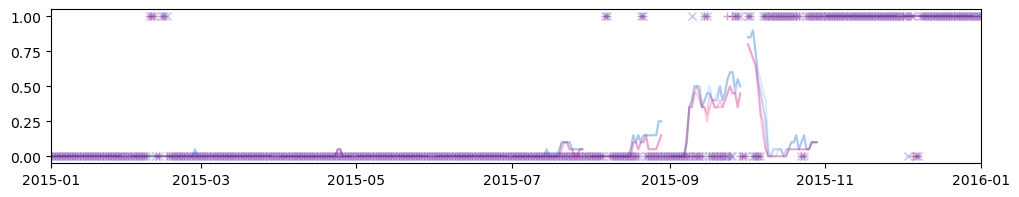

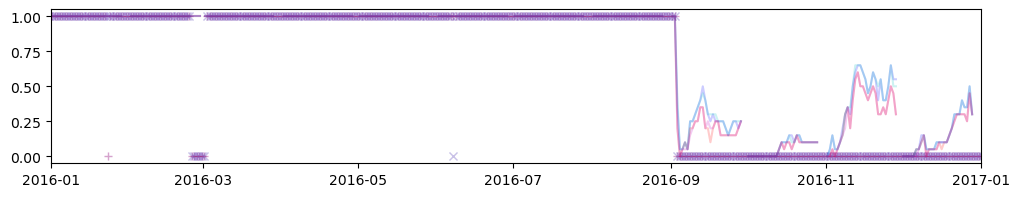

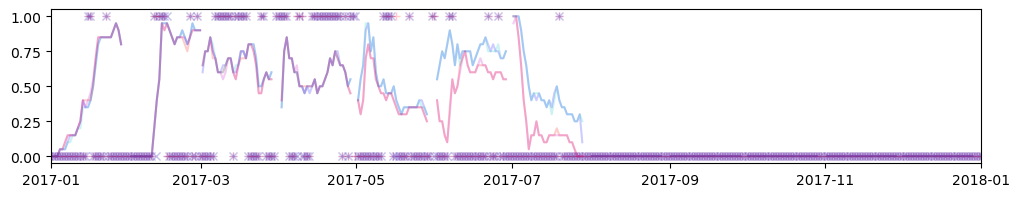

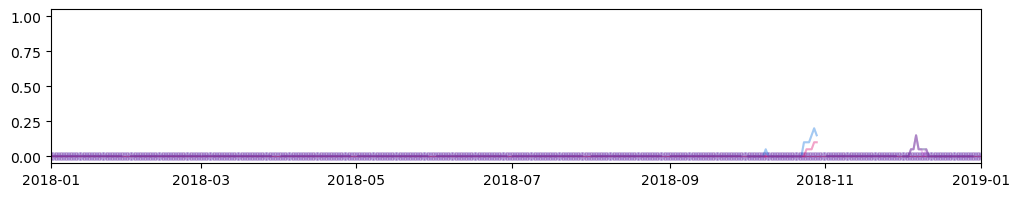

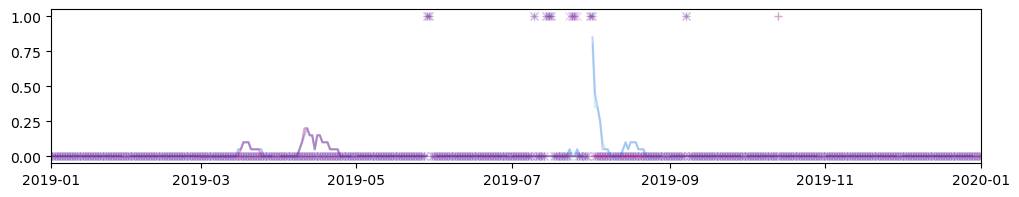

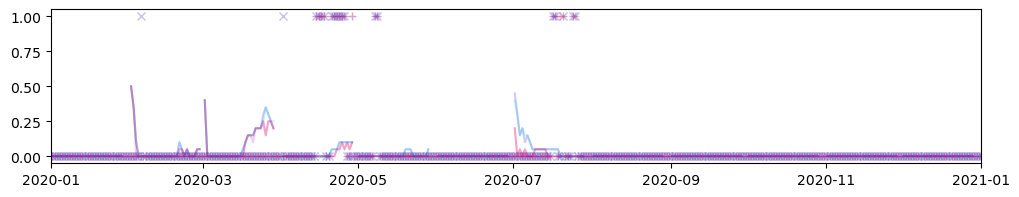

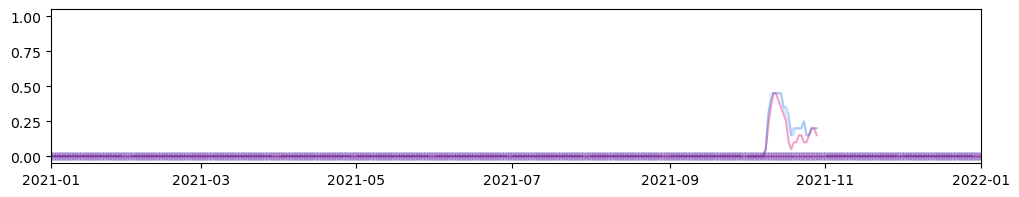

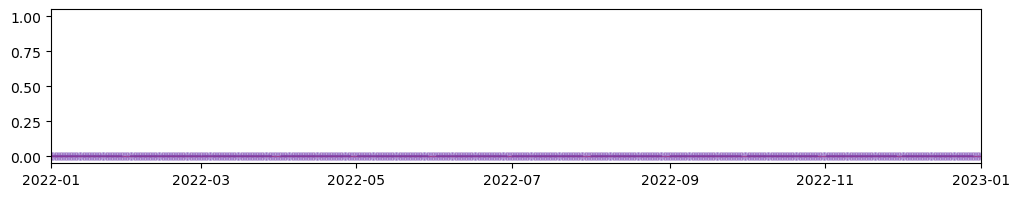

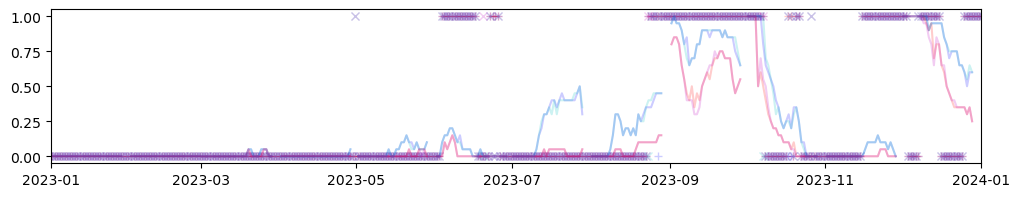

In [15]:
for yr0 in range(1993,2024):
    fig,ax=plt.subplots(1,1,figsize=(12,2))
    ax.plot(tobs,mhw['obs','sm','det'],'b+',alpha=.2)
    ax.plot(tobs,mhw['obs','sm','nod'],'r+',alpha=.2)
    ax.plot(tobs,mhw['obs','id','det'],'cx',alpha=.2)
    ax.plot(tobs,mhw['obs','id','nod'],'mx',alpha=.2)
    for ir in range(0,378):
        tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
        tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
        ax.plot(tmod[:28],mhw['mod','sm','det'][:28,ir,],'b-',alpha=.2)
        ax.plot(tmod[:28],mhw['mod','sm','nod'][:28,ir],'r-',alpha=.2)
        ax.plot(tmod[:28],mhw['mod','id','det'][:28,ir],'c-',alpha=.2)
        ax.plot(tmod[:28],mhw['mod','id','nod'][:28,ir],'m-',alpha=.2)
    ax.set_xlim(dt.datetime(yr0,1,1),dt.datetime(yr0+1,1,1))

Text(0.5, 1.0, 'Mod SST_an')

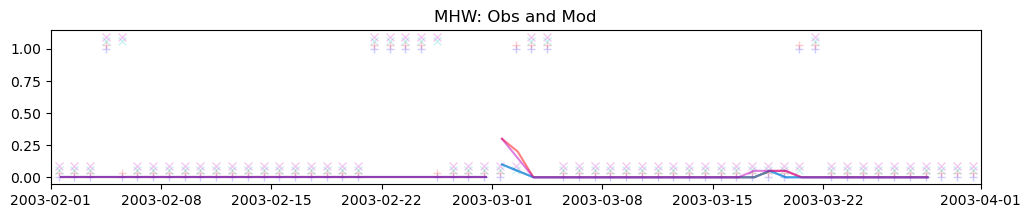

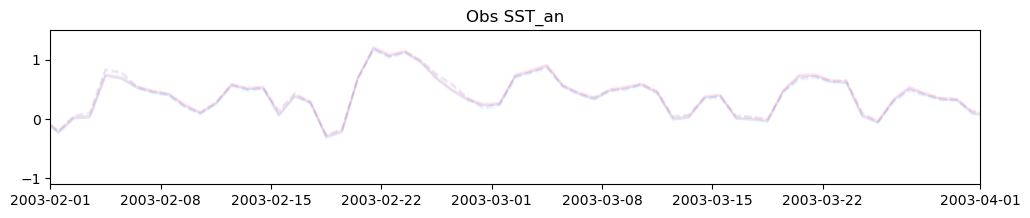

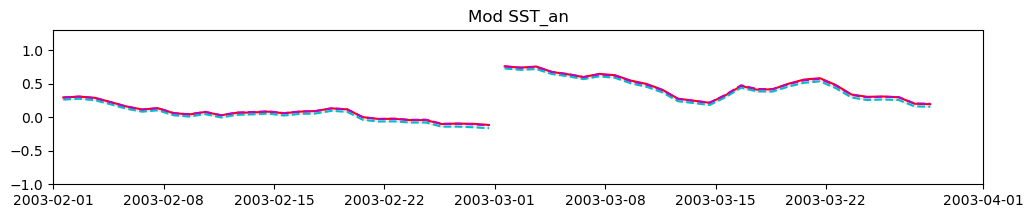

In [16]:
xl=[dt.datetime(2003,2,1),dt.datetime(2003,4,1)]
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,mhw['obs','sm','det']+0.00,'b+',alpha=.2)
ax.plot(tobs,mhw['obs','sm','nod']+0.03,'r+',alpha=.2)
ax.plot(tobs,mhw['obs','id','det']+0.06,'cx',alpha=.2)
ax.plot(tobs,mhw['obs','id','nod']+0.09,'mx',alpha=.2)
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],mhw['mod','sm','det'][:28,ir,],'b-',alpha=.5)
    ax.plot(tmod[:28],mhw['mod','sm','nod'][:28,ir],'r-',alpha=.5)
    ax.plot(tmod[:28],mhw['mod','id','det'][:28,ir],'c-',alpha=.5)
    ax.plot(tmod[:28],mhw['mod','id','nod'][:28,ir],'m-',alpha=.5)
ax.set_xlim(xl)
ax.set_title('MHW: Obs and Mod')

fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,fanom['obs','sm','det']['sst_an'],'b-',alpha=.1)
ax.plot(tobs,fanom['obs','sm','nod']['sst_an'],'r-',alpha=.1)
ax.plot(tobs,fanom['obs','id','det']['sst_an'],'c--',alpha=.1)
ax.plot(tobs,fanom['obs','id','nod']['sst_an'],'m--',alpha=.1)
ax.set_xlim(xl)
ax.set_ylim(-1.1,1.5)
ax.set_title('Obs SST_an')

fig,ax=plt.subplots(1,1,figsize=(12,2))
ie=0
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],sstan['mod','sm','det'][:28,ir,ie],'b-',alpha=.1)
    ax.plot(tmod[:28],sstan['mod','sm','nod'][:28,ir,ie],'r-',alpha=1)
    ax.plot(tmod[:28],sstan['mod','id','det'][:28,ir,ie],'c--',alpha=1)
    ax.plot(tmod[:28],sstan['mod','id','nod'][:28,ir,ie],'m--',alpha=1)
ax.set_xlim(xl)
ax.set_ylim(-1,1.3)
ax.set_title('Mod SST_an')

Text(0.5, 1.0, 'Mod SST_an')

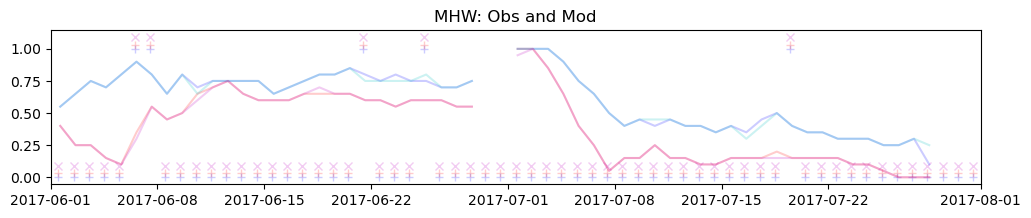

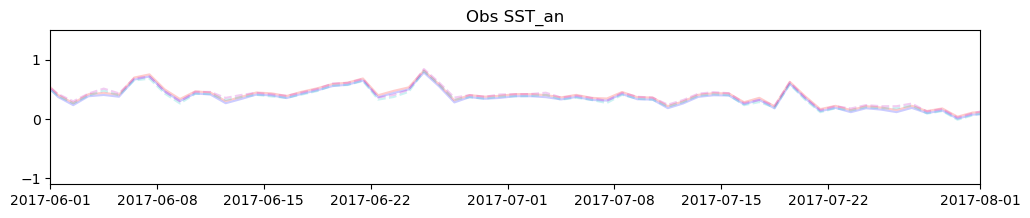

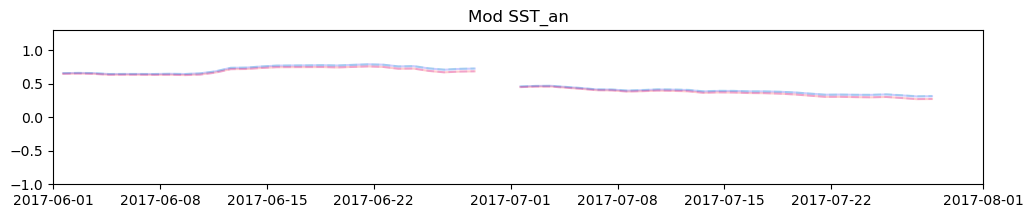

In [17]:
xl=[dt.datetime(2017,6,1),dt.datetime(2017,8,1)]
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,mhw['obs','sm','det']+0.00,'b+',alpha=.2)
ax.plot(tobs,mhw['obs','sm','nod']+0.03,'r+',alpha=.2)
#ax.plot(tobs,mhw['obs','id','det']+0.06,'cx',alpha=.2)
ax.plot(tobs,mhw['obs','id','nod']+0.09,'mx',alpha=.2)
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],mhw['mod','sm','det'][:28,ir,],'b-',alpha=.2)
    ax.plot(tmod[:28],mhw['mod','sm','nod'][:28,ir],'r-',alpha=.2)
    ax.plot(tmod[:28],mhw['mod','id','det'][:28,ir],'c-',alpha=.2)
    ax.plot(tmod[:28],mhw['mod','id','nod'][:28,ir],'m-',alpha=.2)
ax.set_xlim(xl)
ax.set_title('MHW: Obs and Mod')

fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,fanom['obs','sm','det']['sst_an'],'b-',alpha=.2)
ax.plot(tobs,fanom['obs','sm','nod']['sst_an'],'r-',alpha=.2)
ax.plot(tobs,fanom['obs','id','det']['sst_an'],'c--',alpha=.2)
ax.plot(tobs,fanom['obs','id','nod']['sst_an'],'m--',alpha=.2)
ax.set_xlim(xl)
ax.set_ylim(-1.1,1.5)
ax.set_title('Obs SST_an')

fig,ax=plt.subplots(1,1,figsize=(12,2))
ie=0
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],sstan['mod','sm','det'][:28,ir,ie],'b-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','sm','nod'][:28,ir,ie],'r-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','det'][:28,ir,ie],'c--',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','nod'][:28,ir,ie],'m--',alpha=.2)
ax.set_xlim(xl)
ax.set_ylim(-1,1.3)
ax.set_title('Mod SST_an')

Text(0.5, 1.0, 'Mod SST_an')

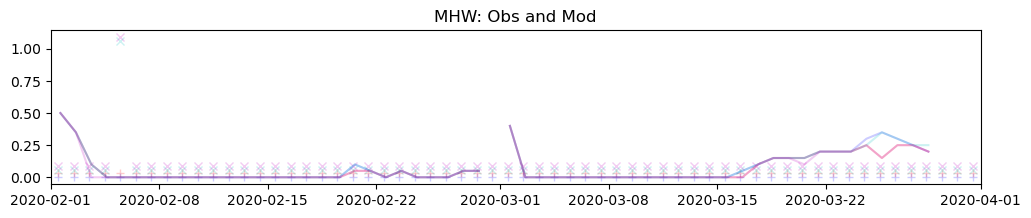

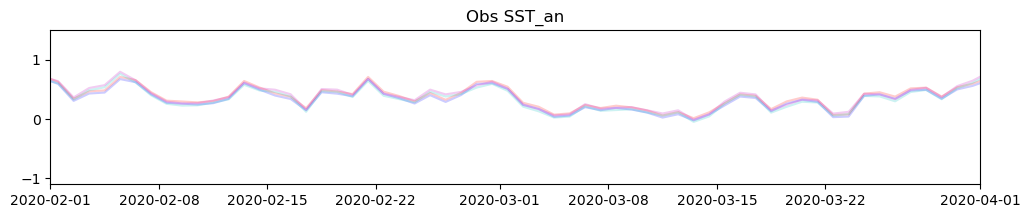

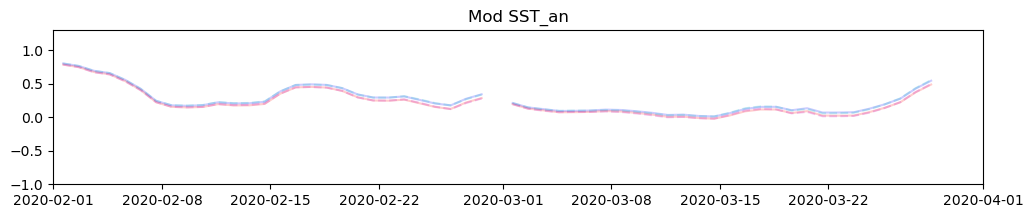

In [18]:
xl=[dt.datetime(2020,2,1),dt.datetime(2020,4,1)]
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,mhw['obs','sm','det']+0.00,'b+',alpha=.2)
ax.plot(tobs,mhw['obs','sm','nod']+0.03,'r+',alpha=.2)
ax.plot(tobs,mhw['obs','id','det']+0.06,'cx',alpha=.2)
ax.plot(tobs,mhw['obs','id','nod']+0.09,'mx',alpha=.2)
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],mhw['mod','sm','det'][:28,ir,],'b-',alpha=.2)
    ax.plot(tmod[:28],mhw['mod','sm','nod'][:28,ir],'r-',alpha=.2)
    ax.plot(tmod[:28],mhw['mod','id','det'][:28,ir],'c-',alpha=.2)
    ax.plot(tmod[:28],mhw['mod','id','nod'][:28,ir],'m-',alpha=.2)
ax.set_xlim(xl)
ax.set_title('MHW: Obs and Mod')

fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,fanom['obs','sm','det']['sst_an'],'b-',alpha=.2)
ax.plot(tobs,fanom['obs','sm','nod']['sst_an'],'r-',alpha=.2)
ax.plot(tobs,fanom['obs','id','det']['sst_an'],'c-',alpha=.2)
ax.plot(tobs,fanom['obs','id','nod']['sst_an'],'m-',alpha=.2)
ax.set_xlim(xl)
ax.set_ylim(-1.1,1.5)
ax.set_title('Obs SST_an')

fig,ax=plt.subplots(1,1,figsize=(12,2))
ie=0
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],sstan['mod','sm','det'][:28,ir,ie],'b-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','sm','nod'][:28,ir,ie],'r-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','det'][:28,ir,ie],'c--',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','nod'][:28,ir,ie],'m--',alpha=.2)
ax.set_xlim(xl)
ax.set_ylim(-1,1.3)
ax.set_title('Mod SST_an')

calculate SEDI from MHW data sets for each case

## lead 0

In [19]:
# lead 0
np.shape(mhw[('mod','sm','det')])

(100, 378)

In [20]:
tmod_L0=dt.datetime(1993,1,1,0)+np.array([dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].reftime.values])+\
    dt.timedelta(days=float(fanom['mod','sm','nod'].leadtime.values[0]/24))
tmod_L0[0],tmod_L0[-1]

(datetime.datetime(1993, 1, 1, 15, 0), datetime.datetime(2024, 6, 1, 15, 0))

In [21]:
indobs=np.array([True if (el.year>=1993 and (el.year<2024 or (el.year==2024 and el.month<=6)) and el.day==1) else False for el in tobs])

In [22]:
tobs_L0=tobs[indobs]
tobs_L0[0],tobs_L0[-1]

(datetime.datetime(1993, 1, 1, 12, 0), datetime.datetime(2024, 6, 1, 12, 0))

In [23]:
mhw_L0=dict()
mhw_L0[('obs','sm','det')]=mhw[('obs','sm','det')][indobs]
mhw_L0[('obs','sm','nod')]=mhw[('obs','sm','nod')][indobs]
mhw_L0[('obs','id','det')]=mhw[('obs','id','det')][indobs]
mhw_L0[('obs','id','nod')]=mhw[('obs','id','nod')][indobs]

mhw_L0[('mod','sm','det')]=mhw[('mod','sm','det')][0,:]
mhw_L0[('mod','sm','nod')]=mhw[('mod','sm','nod')][0,:]
mhw_L0[('mod','id','det')]=mhw[('mod','id','det')][0,:]
mhw_L0[('mod','id','nod')]=mhw[('mod','id','nod')][0,:]

In [24]:
an_L0=dict()
an_L0[('obs','sm','det')]=sstan[('obs','sm','det')][indobs]
an_L0[('obs','sm','nod')]=sstan[('obs','sm','nod')][indobs]
an_L0[('obs','id','det')]=sstan[('obs','id','det')][indobs]
an_L0[('obs','id','nod')]=sstan[('obs','id','nod')][indobs]

an_L0[('mod','sm','det')]=sstan[('mod','sm','det')][0,:]
an_L0[('mod','sm','nod')]=sstan[('mod','sm','nod')][0,:]
an_L0[('mod','id','det')]=sstan[('mod','id','det')][0,:]
an_L0[('mod','id','nod')]=sstan[('mod','id','nod')][0,:]

In [25]:
Q[('mod','sm','det')][0,:].values

array([0.68401031, 0.76672894, 0.77839594, 0.70842649, 0.65284323,
       0.63492288, 0.42104047, 0.41038528, 0.54868389, 0.64614706,
       0.66868785, 0.77092733])

In [26]:
Q[('mod','sm','nod')][0,:].values

array([0.67718702, 0.75034872, 0.7688325 , 0.69254608, 0.6655147 ,
       0.64252046, 0.43331952, 0.44102424, 0.54499062, 0.65682998,
       0.68850479, 0.77125164])

In [27]:
Q[('mod','id','det')][0,:].values

array([0.68297743, 0.76791009, 0.77499155, 0.70675561, 0.65368557,
       0.63473756, 0.42272852, 0.41170614, 0.54910214, 0.65043726,
       0.66288646, 0.76920596])

In [28]:
Q[('mod','id','nod')][0,:].values

array([0.67244205, 0.75135705, 0.76917623, 0.69069157, 0.66645139,
       0.64253168, 0.43464869, 0.44243398, 0.54602084, 0.66117171,
       0.6860413 , 0.77049836])

In [29]:
Q_L0=dict()
ydo_0=ydobs[indobs]
Q_L0[('obs','sm','det')]=np.array([Q[('obs','sm','det')][iyd] for iyd in ydo_0])
Q_L0[('obs','sm','nod')]=np.array([Q[('obs','sm','nod')][iyd] for iyd in ydo_0])
Q_L0[('obs','id','det')]=np.array([Q[('obs','id','det')][iyd] for iyd in ydo_0])
Q_L0[('obs','id','nod')]=np.array([Q[('obs','id','nod')][iyd] for iyd in ydo_0])

Q_L0[('mod','sm','det')]=Q[('mod','sm','det')][0,:]
Q_L0[('mod','sm','nod')]=Q[('mod','sm','nod')][0,:]
Q_L0[('mod','id','det')]=Q[('mod','id','det')][0,:]
Q_L0[('mod','id','nod')]=Q[('mod','id','nod')][0,:]

Text(0.5, 1.0, 'MHW: Obs and Mod')

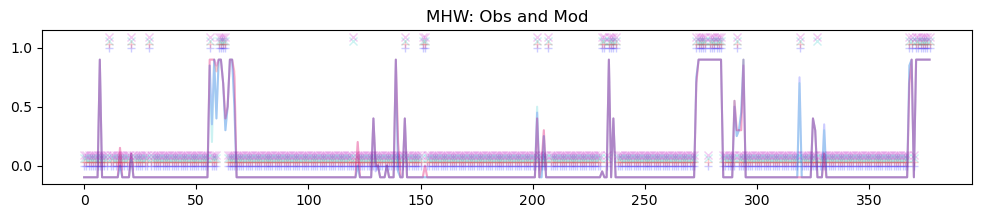

In [30]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(mhw_L0['obs','sm','det']+0.00,'b+',alpha=.2)
ax.plot(mhw_L0['obs','sm','nod']+0.03,'r+',alpha=.2)
ax.plot(mhw_L0['obs','id','det']+0.06,'cx',alpha=.2)
ax.plot(mhw_L0['obs','id','nod']+0.09,'mx',alpha=.2)
###
ax.plot(mhw_L0['mod','sm','det']-.1,'b-',alpha=.2)
ax.plot(mhw_L0['mod','sm','nod']-.1,'r-',alpha=.2)
ax.plot(mhw_L0['mod','id','det']-.1,'c-',alpha=.2)
ax.plot(mhw_L0['mod','id','nod']-.1,'m-',alpha=.2)
ax.set_title('MHW: Obs and Mod')

Text(0.5, 1.0, 'SST An: Obs and Mod')

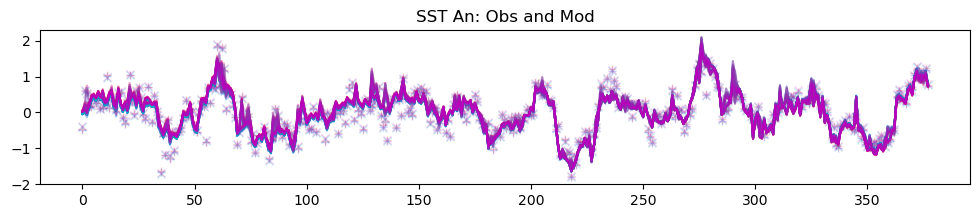

In [31]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(an_L0['obs','sm','det'],'b+',alpha=.2)
ax.plot(an_L0['obs','sm','nod'],'r+',alpha=.2)
ax.plot(an_L0['obs','id','det'],'cx',alpha=.2)
ax.plot(an_L0['obs','id','nod'],'mx',alpha=.2)
###
ax.plot(an_L0['mod','sm','det'],'b-',alpha=.2)
ax.plot(an_L0['mod','sm','nod'],'r-',alpha=.2)
ax.plot(an_L0['mod','id','det'],'c-',alpha=.2)
ax.plot(an_L0['mod','id','nod'],'m-',alpha=.2)
ax.set_title('SST An: Obs and Mod')

Text(0.5, 1.0, 'SST An: Obs and Mod')

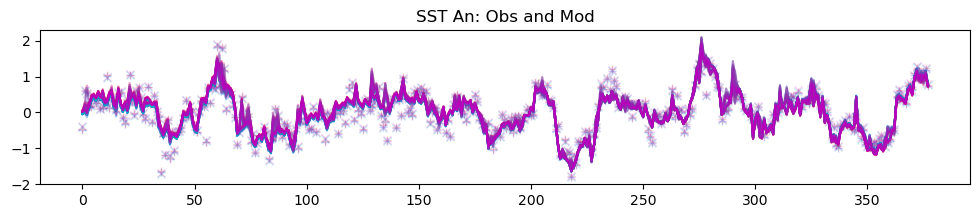

In [32]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(an_L0['obs','sm','det'],'b+',alpha=.2)
ax.plot(an_L0['obs','sm','nod'],'r+',alpha=.2)
ax.plot(an_L0['obs','id','det'],'cx',alpha=.2)
ax.plot(an_L0['obs','id','nod'],'mx',alpha=.2)
###
ax.plot(an_L0['mod','sm','det'],'b-',alpha=.2)
ax.plot(an_L0['mod','sm','nod'],'r-',alpha=.2)
ax.plot(an_L0['mod','id','det'],'c-',alpha=.2)
ax.plot(an_L0['mod','id','nod'],'m-',alpha=.2)
ax.set_title('SST An: Obs and Mod')

In [33]:
def calc_SEDI(mhwfor,mhwobs):
    M=20
    N_pos=20*mhwfor
    N_neg=20-N_pos
    TP=np.where(mhwobs==1,N_pos,0).sum()
    TN=np.where(mhwobs==0,N_neg,0).sum()
    FP=np.where(mhwobs==0,N_pos,0).sum()
    FN=np.where(mhwobs==1,N_neg,0).sum()
    # calculate SEDI, summed over time
    Nobs_pos=np.sum(mhwobs,axis=0)
    Nobs_neg=np.sum(1-mhwobs,axis=0)
    F=FP/(Nobs_neg*M)
    H=TP/(Nobs_pos*M)
    SEDI=(np.log(F)-np.log(H)-np.log(1-F)+np.log(1-H))/(np.log(F)+np.log(H)+np.log(1-F)+np.log(1-H))
    return SEDI,TP,TN,FP,FN

In [34]:
SEDI,TP,TN,FP,FN=calc_SEDI(mhw_L0[('mod','sm','det')],mhw_L0[('obs','sm','det')])
print(f'SEDI: {SEDI:.2f}  TP: {TP}  TN: {TN}  FP: {TP} FN: {FN}')

SEDI: 0.82  TP: 559.0  TN: 6472.0  FP: 559.0 FN: 261.0


In [35]:
SEDI,TP,TN,FP,FN=calc_SEDI(mhw_L0[('mod','sm','nod')],mhw_L0[('obs','sm','nod')])
print(f'SEDI: {SEDI:.2f}  TP: {TP}  TN: {TN}  FP: {TP} FN: {FN}')

SEDI: 0.80  TP: 543.0  TN: 6438.0  FP: 543.0 FN: 277.0


In [36]:
SEDI,TP,TN,FP,FN=calc_SEDI(mhw_L0[('mod','id','det')],mhw_L0[('obs','id','det')])
print(f'SEDI: {SEDI:.2f}  TP: {TP}  TN: {TN}  FP: {TP} FN: {FN}')

SEDI: 0.80  TP: 558.0  TN: 6434.0  FP: 558.0 FN: 302.0


In [37]:
SEDI,TP,TN,FP,FN=calc_SEDI(mhw_L0[('mod','id','nod')],mhw_L0[('obs','id','nod')])
print(f'SEDI: {SEDI:.2f}  TP: {TP}  TN: {TN}  FP: {TP} FN: {FN}')

SEDI: 0.78  TP: 543.0  TN: 6398.0  FP: 543.0 FN: 317.0


In [88]:
def calcdur(MHWseries,dayson=1,daysoff=1):
    # for now, count MHWs that maybe cut off by sampling period
    # assume for now that MHWseries is 1d array, dimension is time in days
    oncount=0
    offcount=0
    MHWdur=0
    istarts=[]
    iends=[]
    durs=[]
    inMHW=False
    # iterate through elements in time series
    for ii, el in enumerate(MHWseries):
        if inMHW: # inMHW=True
            if el==1:   # MHW+ day while inMHW: reset offcount, increment MHWdur
                MHWdur=MHWdur+1 
                offcount=0
            else:    # MHW- day while inMHW: increment offcount, don't increment MHWdur
                offcount=offcount+1
            if offcount>=daysoff: # offcount surpassed; exit MHW; record iend, MHWdur; reset oncount
                inMHW=False
                iends.append(ii-1) # prior index was last
                durs.append(MHWdur)
                MHWdur=0
                oncount=0
        else:     # inMHW=False
            if el==1:   # MHW+ day while not inMHW: increment oncount
                oncount=oncount+1 # previously not in MHW, MHW+ day
            else:    # MHW- day while not inMHW: oncount=0
                oncount=0
            if oncount>=dayson: # if oncount surpassed, enter MHW; increment MHWdur; record istart; reset offcount
                inMHW=True # switch to inMHW=True
                MHWdur=oncount # oncount MHWdays have occurred
                istarts.append(ii)
                offcount=0
    # if series ended in MHW, record last (partial) MHW:
    if inMHW:
        iends.append(ii) # index has not been incremented beyond final value
        durs.append(MHWdur)
    return np.array(istarts), np.array(iends), np.array(durs)
                

In [89]:
indstarts,indends,MHWdurs=calcdur(mhw['obs','sm','nod'])

In [90]:
indstarts, indends,MHWdurs

(array([   53,    74,    94,   104,   243,   258,   265,   271,   282,
          289,   318,   323,   326,   341,   354,   368,   385,   391,
          393,   414,   419,   433,   461,   464,   476,   481,   494,
          504,   520,   530,   541,   605,   830,   865,   872,   875,
          888,   894,   902,   924,   933,   944,   957,   963,   965,
          986,   989,   993,  1016,  1026,  1029,  1041,  1065,  1073,
         1078,  1115,  1139,  1156,  1167,  1172,  1194,  1206,  1208,
         1217,  1228,  1236,  1245,  1248,  1342,  1359,  1364,  1368,
         1376,  1384,  1402,  1476,  1481,  1493,  1541,  1568,  1587,
         1602,  1610,  1617,  1630,  1654,  1682,  2271,  2341,  2417,
         2420,  2431,  2448,  2474,  2480,  2497,  2502,  2542,  2547,
         2557,  2590,  2593,  2596,  2604,  2612,  2641,  2653,  2660,
         2663,  2680,  2685,  2694,  2699,  2704,  2706,  2710,  2715,
         2722,  2727,  2731,  2739,  2756,  2758,  3368,  3709,  3715,
      

In [91]:
np.mean(MHWdurs)

np.float64(4.838596491228071)

In [92]:
indstarts2,indends2,MHWdurs2=calcdur(mhw['obs','sm','nod'],2,2)

In [93]:
indstarts2,indends2,MHWdurs2

(array([   54,   266,   272,   283,   290,   319,   324,   342,   355,
          369,   386,   394,   420,   434,   465,   477,   482,   531,
          831,   866,   873,   889,   895,   903,   934,   945,   987,
          994,  1017,  1027,  1066,  1074,  1079,  1116,  1157,  1168,
         1195,  1209,  1218,  1237,  1246,  1343,  1360,  1369,  1385,
         1477,  1611,  1618,  1683,  2421,  2432,  2449,  2475,  2481,
         2503,  2548,  2558,  2605,  2613,  2642,  2654,  2664,  2695,
         2700,  2707,  2711,  2723,  2728,  2759,  3369,  3710,  4157,
         4400,  4412,  4435,  4444,  4462,  4554,  4569,  4676,  4708,
         4751,  4850,  4936,  4952,  4973,  4977,  5042,  5065,  5082,
         5091,  5113,  5125,  5239,  5256,  5288,  5310,  5325,  5333,
         5358,  5829,  6068,  6868,  6875,  6880,  6894,  6915,  6938,
         6943,  6956,  6964,  6985,  6990,  7011,  7020,  7792,  7799,
         7834,  7847,  7883,  7891,  7904,  7928,  7950,  7965,  7981,
      

In [103]:
np.mean(MHWdurs2),np.max(MHWdurs2)

(np.float64(7.654761904761905), np.int64(185))

In [99]:
indstarts3,indends3,MHWdurs3=calcdur(mhw['obs','sm','nod'],3,3)

In [104]:
np.mean(MHWdurs3),np.max(MHWdurs3)

(np.float64(12.655555555555555), np.int64(185))

In [101]:
indstarts5,indends5,MHWdurs5=calcdur(mhw['obs','sm','nod'],5,5)

In [105]:
np.mean(MHWdurs5),np.max(MHWdurs5)

(np.float64(25.0), np.int64(185))

In [97]:
len(MHWdurs),len(MHWdurs2),len(MHWdurs3)

(285, 168, 90)